# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

* Apartir dos estudos e do projeto 1, vamos aprofundar um pouco mais nesse projeto 2. Vamos utilizar o csv "previsao_de_renda" arquivo Comma Separated Values(csv). 
* De acordo com a variavel dos ultimos 15 meses vamos fazer um melhor entendimento de renda, data e qual sexo mais utiliza as variaveis.
* Nisso poderemos ver oque cada sexo preza mais para suas vidas.

Atividades do CRISP-DM:

* Objetivos do negócio

Objetivo é ter informações de diversas variáveis para obter um melhor intendimento dos clientes.

* Objetivos da modelagem

O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.


## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 14 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

Dicionário de dados
Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:


### Dicionário de dados


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência                                 | texto        |
| id_cliente              |  Código cliente                                     | inteiro      |
| sexo                    |  Sexo                                               | M/F          |
| posse_de_veiculo        |  Possui veículo                                     | Y/N          |
| posse_de_imovel         |  Possui imóvel                                      | Y/N          |
| qtd_filhos              |  Quantidade de filhos                               | inteiro      |
| tipo_renda              |  Tipo de renda                                      | texto        |
| educacao                |  Escolaridade                                       | texto        |
| estado_civil            |  Estado civil                                       | texto        |
| tipo_residencia         |  Tipo de residência                                 | texto        |
| idade                   |  Idade                                              | inteiro      |
| tempo_emprego           |  Tempo no emprego                                   | float        |
| qt_pessoas_residencia   |  Quantidade de pessoas na residência                | float        |
| renda                   |  Renda                                              | float        |




#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
pip intall numpy

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "intall" - maybe you meant "install"



In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

%matplotlib inline

#### Carregando os dados

In [4]:
renda = pd.read_csv('./input/previsao_de_renda.csv')
renda.drop(['Unnamed: 0'], axis=1)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [5]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [6]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




In [8]:
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

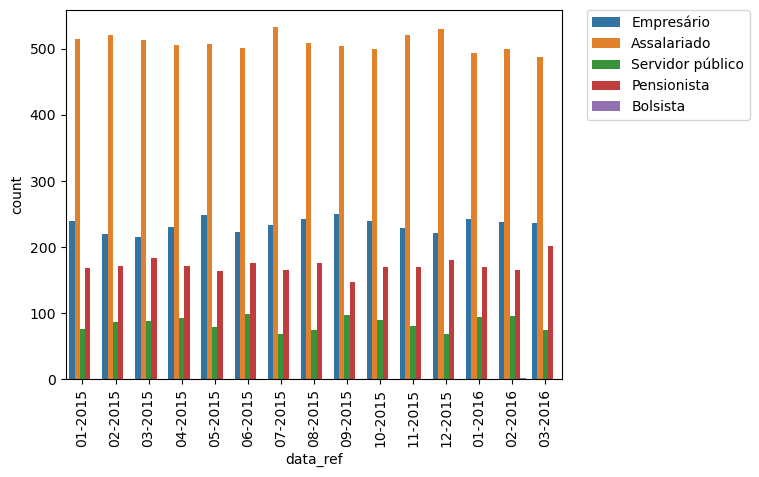

In [9]:
# tipo_renda
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='tipo_renda'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\Users\tales\AppData\Local\Temp\ipykernel_1324\3461251642.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


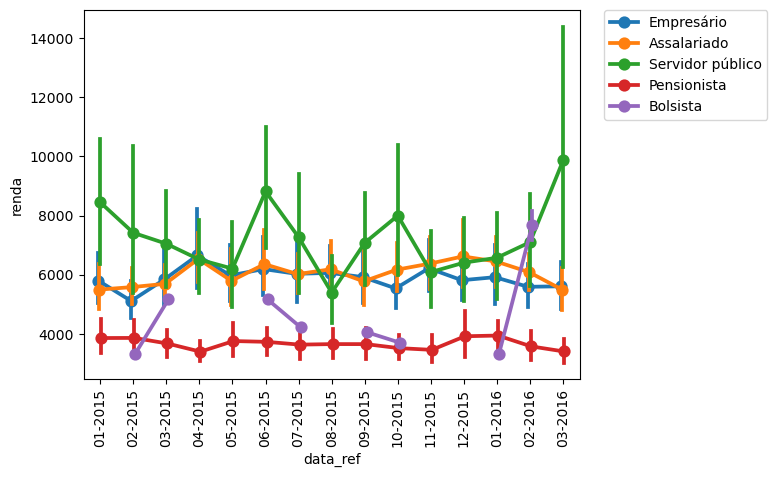

In [10]:
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='tipo_renda',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

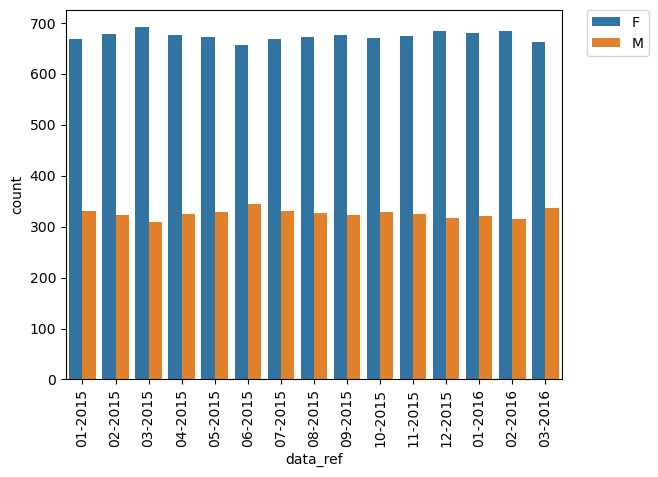

In [11]:
# sexo que mais utiliza o serviço 
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='sexo'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\Users\tales\AppData\Local\Temp\ipykernel_1324\3272418949.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


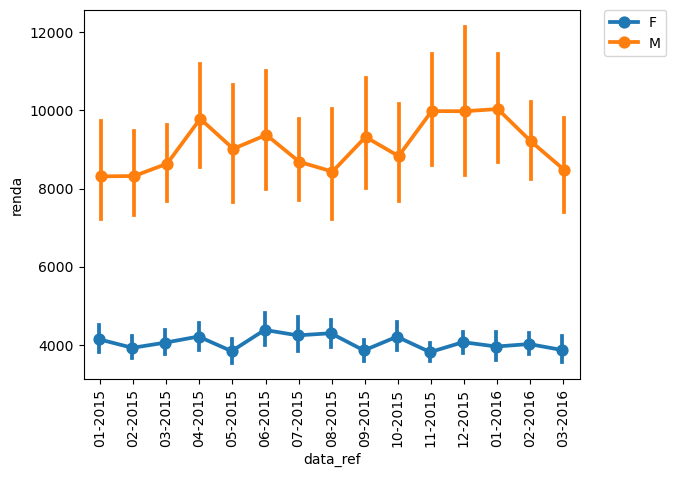

In [12]:
# quem recebe mais
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='sexo',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

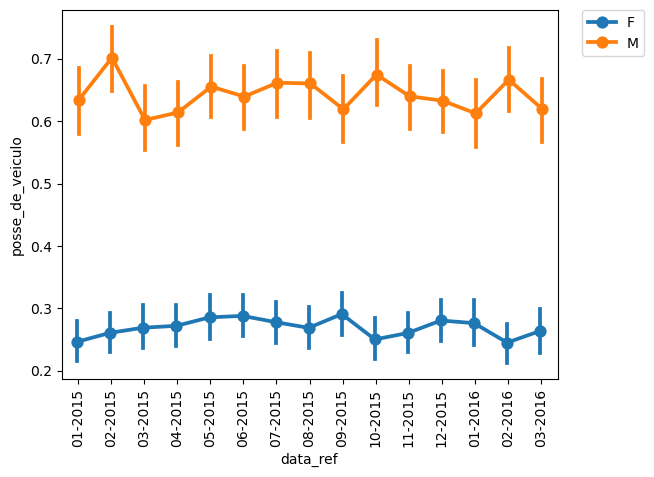

In [13]:
# posse veiculo por sexo
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='posse_de_veiculo',
    hue='sexo',
    dodge=True,
)

plt.legend(loc='lower center', bbox_to_anchor=(0.3, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\Users\tales\AppData\Local\Temp\ipykernel_1324\1908746118.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


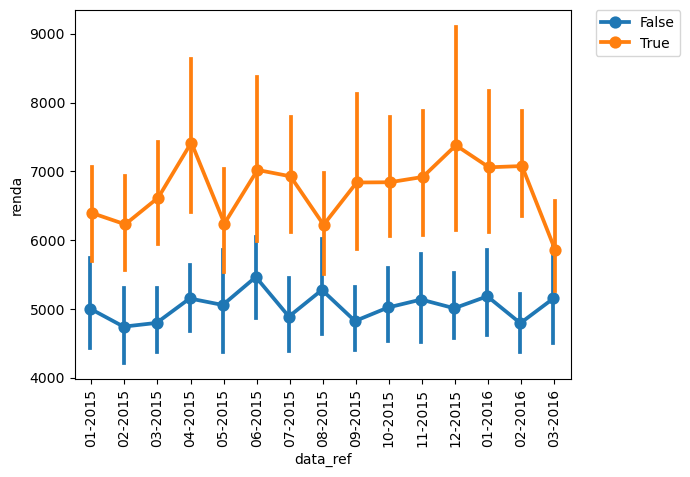

In [14]:
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='posse_de_veiculo',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

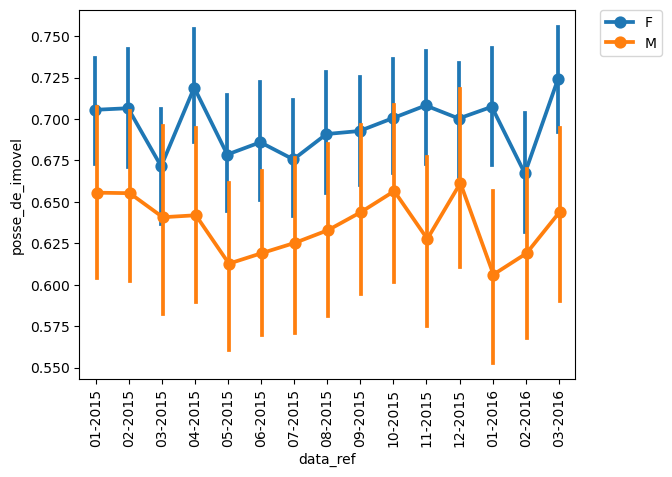

In [15]:
# posse de imovel por sexo
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='posse_de_imovel',
    hue='sexo',
    dodge=True,
)

plt.legend(loc='lower center', bbox_to_anchor=(0.3, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\Users\tales\AppData\Local\Temp\ipykernel_1324\3536338632.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


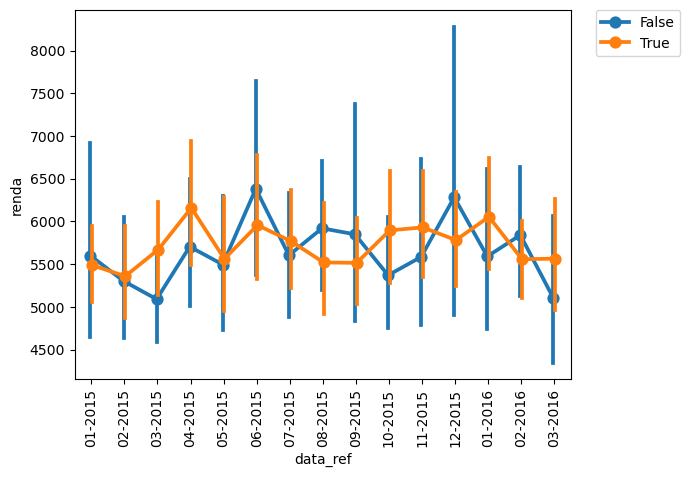

In [16]:
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='posse_de_imovel',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

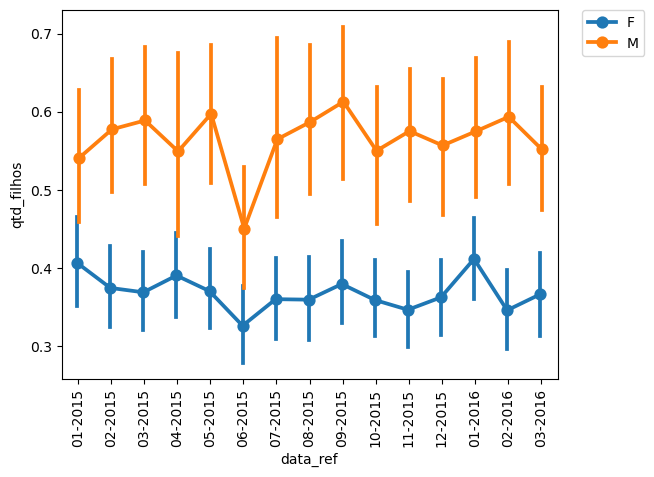

In [17]:
# quantidade de filho por sexo
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='qtd_filhos',
    hue='sexo',
    dodge=True,
)

plt.legend(loc='lower center', bbox_to_anchor=(0.3, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\Users\tales\AppData\Local\Temp\ipykernel_1324\2169845983.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(


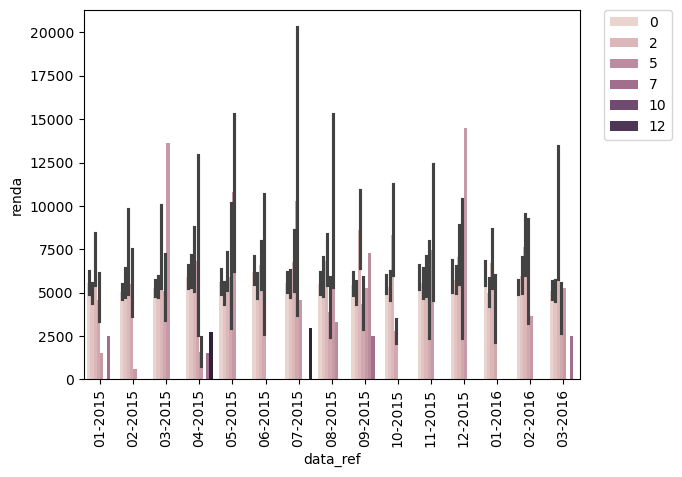

In [18]:
ax = sns.barplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='qtd_filhos',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

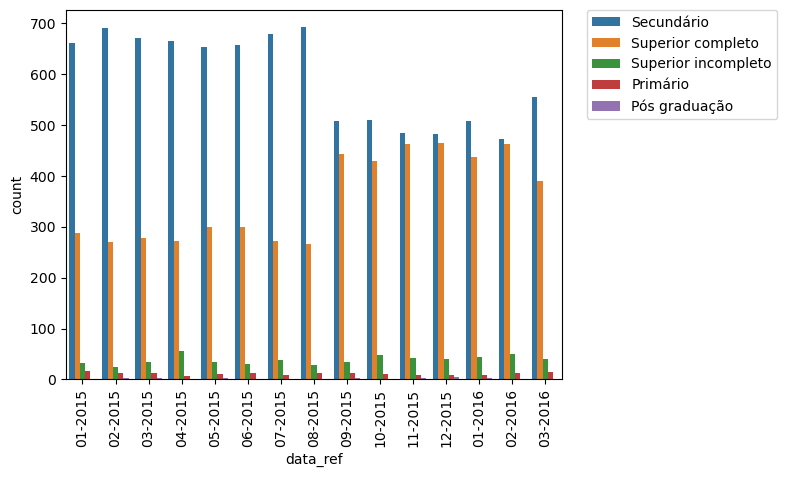

In [19]:
# educação
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='educacao'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\Users\tales\AppData\Local\Temp\ipykernel_1324\2856633777.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


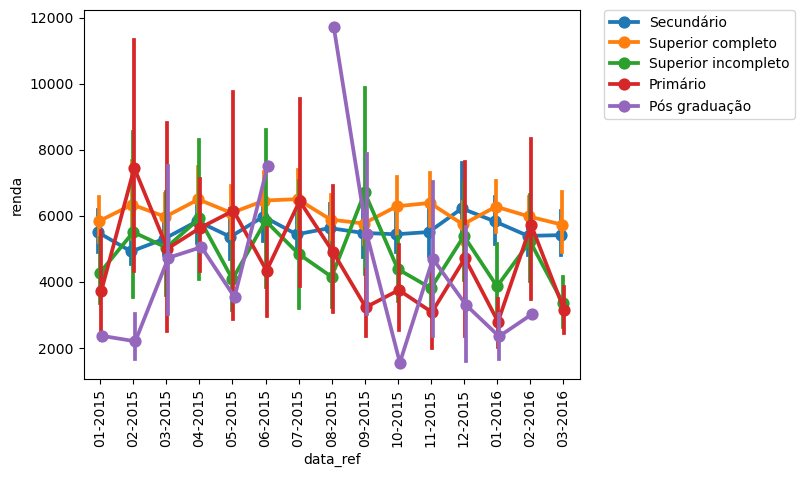

In [20]:
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='educacao',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

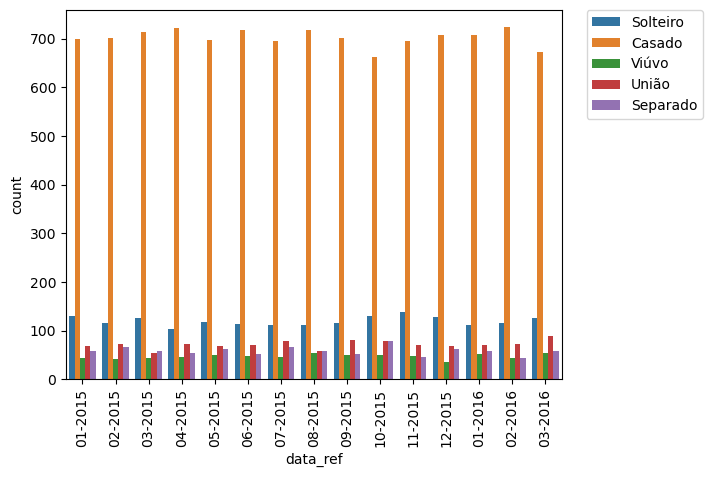

In [21]:
# estado civil
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='estado_civil'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

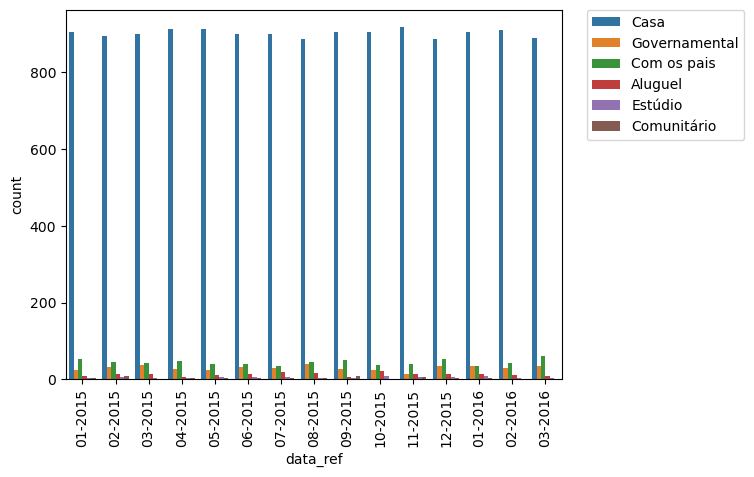

In [22]:
# tipo_residencia
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='tipo_residencia'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\Users\tales\AppData\Local\Temp\ipykernel_1324\309695132.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


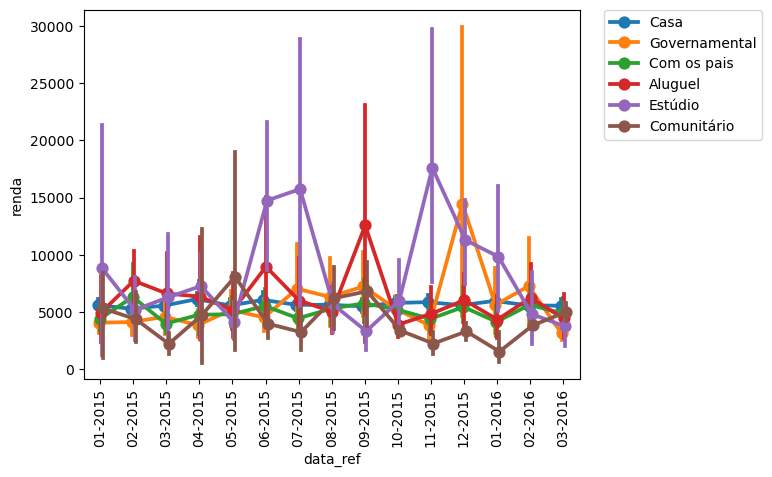

In [23]:
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='tipo_residencia',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

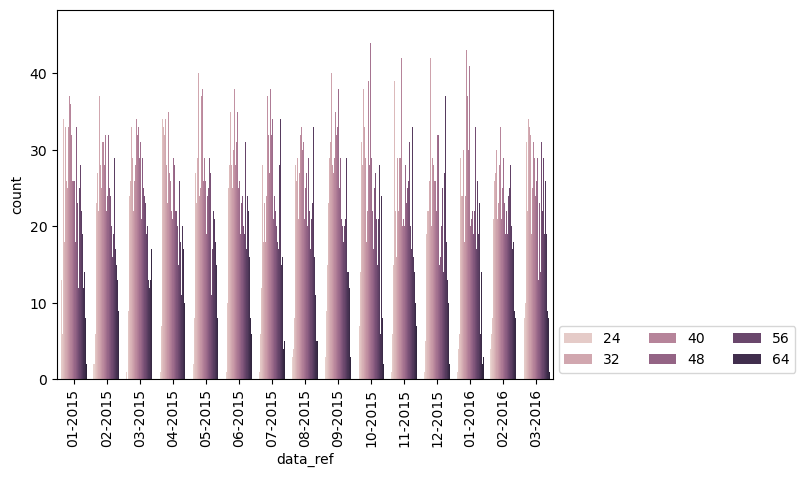

In [24]:
# idade
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='idade'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(loc='lower center', bbox_to_anchor=(1.25, -.0), ncol=3)

C:\Users\tales\AppData\Local\Temp\ipykernel_1324\854886804.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


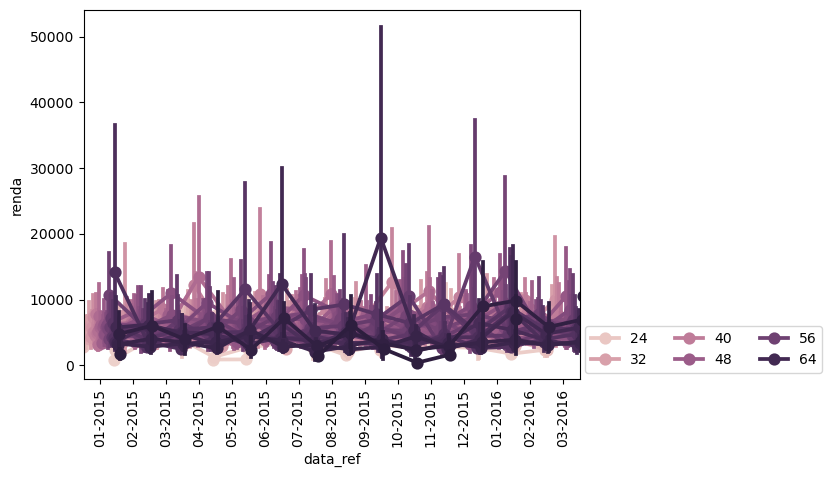

In [25]:
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='idade',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(loc='lower center', bbox_to_anchor=(1.25, -.0), ncol=3)

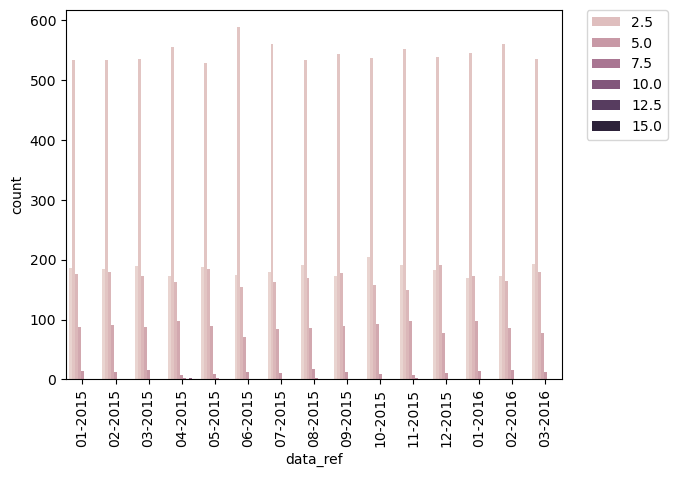

In [26]:
# qt_pessoas_residencia
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='qt_pessoas_residencia'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\Users\tales\AppData\Local\Temp\ipykernel_1324\247445298.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


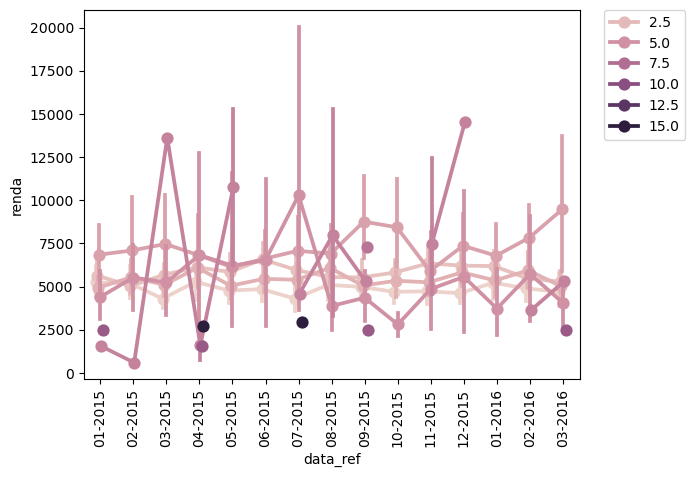

In [27]:
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='qt_pessoas_residencia',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



## seleção: Já temos os dados selecionados adequadamente?


In [28]:
 renda = renda.drop(['Unnamed: 0', 'data_ref', 'id_cliente', 'tempo_emprego'], axis=1)

## Limpeza

In [29]:
renda.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [30]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   qt_pessoas_residencia  15000 non-null  float64
 10  renda                  15000 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 1.1+ MB


In [31]:
# Tirando duplicados
renda = renda.drop_duplicates()
renda = renda.reset_index(drop=True)
print(renda.shape)
print("")
print(renda.info())

(10447, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   10447 non-null  object 
 1   posse_de_veiculo       10447 non-null  bool   
 2   posse_de_imovel        10447 non-null  bool   
 3   qtd_filhos             10447 non-null  int64  
 4   tipo_renda             10447 non-null  object 
 5   educacao               10447 non-null  object 
 6   estado_civil           10447 non-null  object 
 7   tipo_residencia        10447 non-null  object 
 8   idade                  10447 non-null  int64  
 9   qt_pessoas_residencia  10447 non-null  float64
 10  renda                  10447 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 755.1+ KB
None


## Construcao de uma variavel
[Python | Creating a Pandas dataframe column based on a given condition]
(https://www.geeksforgeeks.org/python-creating-a-pandas-dataframe-column-based-on-a-given-condition/)

In [32]:
df = pd.DataFrame({'Date' : ['11/8/2011', '11/9/2011', '11/10/2011',
                                        '11/11/2011', '11/12/2011'],
                'Event' : ['Music', 'Poetry', 'Music', 'Comedy', 'Poetry']})
print(df)

         Date   Event
0   11/8/2011   Music
1   11/9/2011  Poetry
2  11/10/2011   Music
3  11/11/2011  Comedy
4  11/12/2011  Poetry


In [33]:
df['Price'] = [1500 if x =='Music' else 800 for x in df['Event']]
 
# Print the DataFrame
print(df)

         Date   Event  Price
0   11/8/2011   Music   1500
1   11/9/2011  Poetry    800
2  11/10/2011   Music   1500
3  11/11/2011  Comedy    800
4  11/12/2011  Poetry    800


In [34]:
def set_value(row_number, assigned_value):
    return assigned_value[row_number]
 
# Create the dictionary
event_dictionary ={'Music' : 1500, 'Poetry' : 800, 'Comedy' : 1200}
 
# Add a new column named 'Price'
df['Price'] = df['Event'].apply(set_value, args =(event_dictionary, ))
 
# Print the DataFrame
print(df)

         Date   Event  Price
0   11/8/2011   Music   1500
1   11/9/2011  Poetry    800
2  11/10/2011   Music   1500
3  11/11/2011  Comedy   1200
4  11/12/2011  Poetry    800


In [35]:
# Create the dictionary
event_dictionary ={'Music' : 1500, 'Poetry' : 800, 'Comedy' : 1200}
 
# Add a new column named 'Price'
df['Price'] = df['Event'].map(event_dictionary)
 
# Print the DataFrame
print(df)

         Date   Event  Price
0   11/8/2011   Music   1500
1   11/9/2011  Poetry    800
2  11/10/2011   Music   1500
3  11/11/2011  Comedy   1200
4  11/12/2011  Poetry    800


In [36]:
df['Price'] = np.where(df['Event']
                       =='Music', 1500,800 )
 
print(df)

         Date   Event  Price
0   11/8/2011   Music   1500
1   11/9/2011  Poetry    800
2  11/10/2011   Music   1500
3  11/11/2011  Comedy    800
4  11/12/2011  Poetry    800


## integração: Temos apenas uma fonte de dados, não é necessário integração

In [37]:
 print(renda.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   10447 non-null  object 
 1   posse_de_veiculo       10447 non-null  bool   
 2   posse_de_imovel        10447 non-null  bool   
 3   qtd_filhos             10447 non-null  int64  
 4   tipo_renda             10447 non-null  object 
 5   educacao               10447 non-null  object 
 6   estado_civil           10447 non-null  object 
 7   tipo_residencia        10447 non-null  object 
 8   idade                  10447 non-null  int64  
 9   qt_pessoas_residencia  10447 non-null  float64
 10  renda                  10447 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 755.1+ KB
None


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


In [38]:
renda = pd.get_dummies(renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True).copy()
renda.dtypes

posse_de_veiculo                    bool
posse_de_imovel                     bool
qtd_filhos                         int64
idade                              int64
qt_pessoas_residencia            float64
renda                            float64
sexo_M                              bool
tipo_renda_Bolsista                 bool
tipo_renda_Empresário               bool
tipo_renda_Pensionista              bool
tipo_renda_Servidor público         bool
educacao_Pós graduação              bool
educacao_Secundário                 bool
educacao_Superior completo          bool
educacao_Superior incompleto        bool
estado_civil_Separado               bool
estado_civil_Solteiro               bool
estado_civil_União                  bool
estado_civil_Viúvo                  bool
tipo_residencia_Casa                bool
tipo_residencia_Com os pais         bool
tipo_residencia_Comunitário         bool
tipo_residencia_Estúdio             bool
tipo_residencia_Governamental       bool
dtype: object

In [39]:
X = renda.drop(['renda'], axis=1).copy()
y = renda['renda']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               10447 non-null  bool   
 1   posse_de_imovel                10447 non-null  bool   
 2   qtd_filhos                     10447 non-null  int64  
 3   idade                          10447 non-null  int64  
 4   qt_pessoas_residencia          10447 non-null  float64
 5   sexo_M                         10447 non-null  bool   
 6   tipo_renda_Bolsista            10447 non-null  bool   
 7   tipo_renda_Empresário          10447 non-null  bool   
 8   tipo_renda_Pensionista         10447 non-null  bool   
 9   tipo_renda_Servidor público    10447 non-null  bool   
 10  educacao_Pós graduação         10447 non-null  bool   
 11  educacao_Secundário            10447 non-null  bool   
 12  educacao_Superior completo     10447 non-null 

In [40]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10447 entries, 0 to 10446
Series name: renda
Non-Null Count  Dtype  
--------------  -----  
10447 non-null  float64
dtypes: float64(1)
memory usage: 81.7 KB


### Rodando o modelo

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2360873)

In [42]:
reg1 = DecisionTreeRegressor(max_depth=2)
reg2 = DecisionTreeRegressor(max_depth=8)

reg1.fit(X_test, y_test)
reg2.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=8)

In [43]:
mse1 = reg1.score(X_test, y_test)
mse2 = reg2.score(X_test, y_test)

template = "O R-quadrado da árvore com profundidade {0} é: {1:.2f}"

print(template.format(reg1.get_depth(), mse1).replace(".", ","))
print(template.format(reg2.get_depth(), mse2).replace(".", ","))

O R-quadrado da árvore com profundidade 2 é: 0,11
O R-quadrado da árvore com profundidade 8 é: 0,39


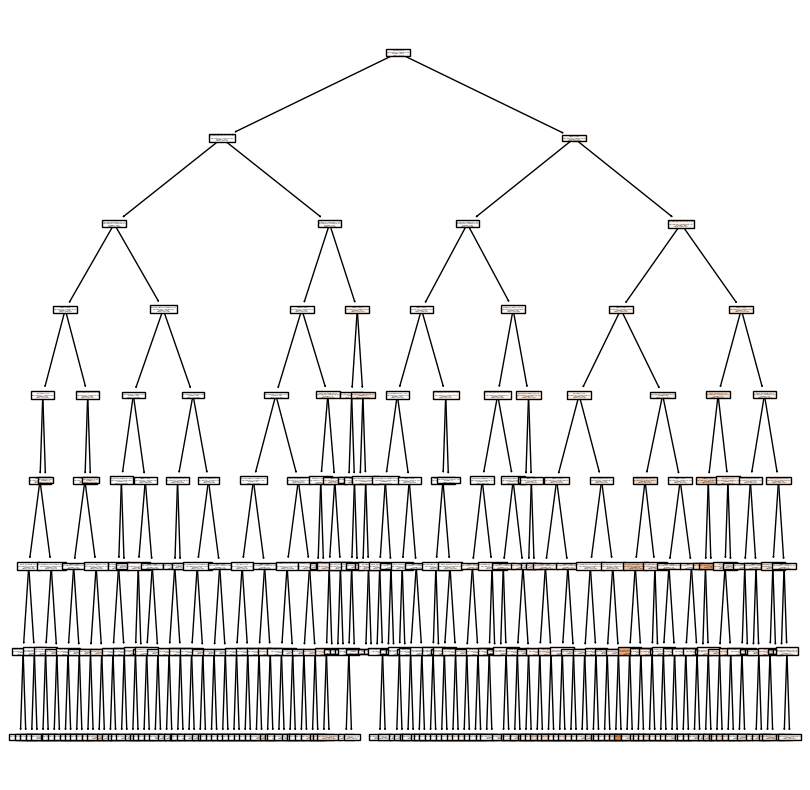

In [44]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(reg2,
                    feature_names=X_test.columns,
                    filled=True)

In [45]:
# Pré poda da melhor árvore

reg2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=20)
reg2.fit(X_train, y_train)
mse1 = reg2.score(X_test, y_test)
mse1

0.08754518559720537

n_minimo,1,2,3,4,5,6,7,8
profundidade,,,,,,,,
1,0.082241,0.082241,0.082241,0.082241,0.082241,0.082241,0.082241,0.082241
2,0.091825,0.091825,0.091825,0.091825,0.091825,0.091825,0.091825,0.091825
3,0.106674,0.106674,0.106674,0.106674,0.113832,0.113832,0.113832,0.113832
4,0.120418,0.120418,0.120418,0.120418,0.107872,0.107928,0.107928,0.107928
5,0.113600,0.113599,0.113585,0.113461,0.123792,0.111297,0.111297,0.111291
6,0.111960,0.111925,0.112676,0.112690,0.110574,0.097204,0.097010,0.112808
7,0.063305,0.081826,0.112473,0.117102,0.123714,0.113404,0.099325,0.119865
8,0.050374,0.076196,0.108348,0.113623,0.152601,0.141134,0.125612,0.122908


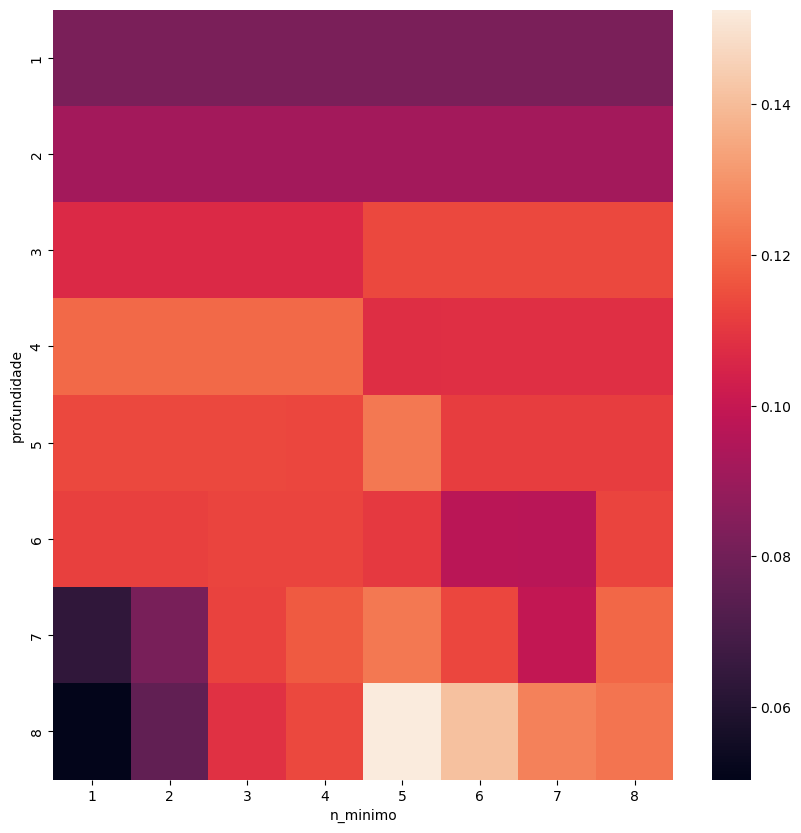

In [46]:
mses = []
ind_i = []
ind_j = []

for i in range(1, 9):
    for j in range(1, 9):
        reg2 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        reg2.fit(X_train, y_train)
        mse1 = reg2.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)

df_mse = pd.DataFrame({'mses': mses, 'profundidade': ind_i, 'n_minimo': ind_j})
sns.heatmap(df_mse.pivot(index='profundidade',
            columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

Text(0, 0.5, 'Impureza total das folhas')

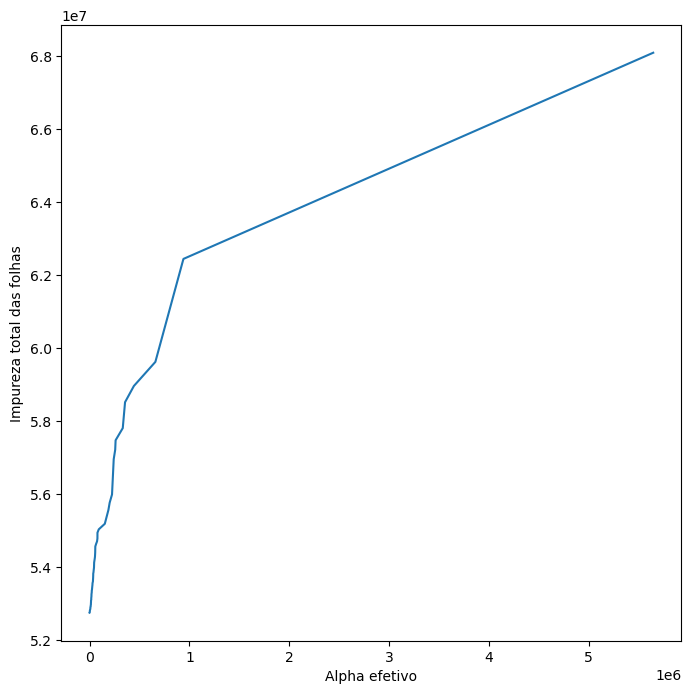

In [55]:
path = reg2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(8, 8))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [56]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_test, y_test)
    clfs.append(clf)

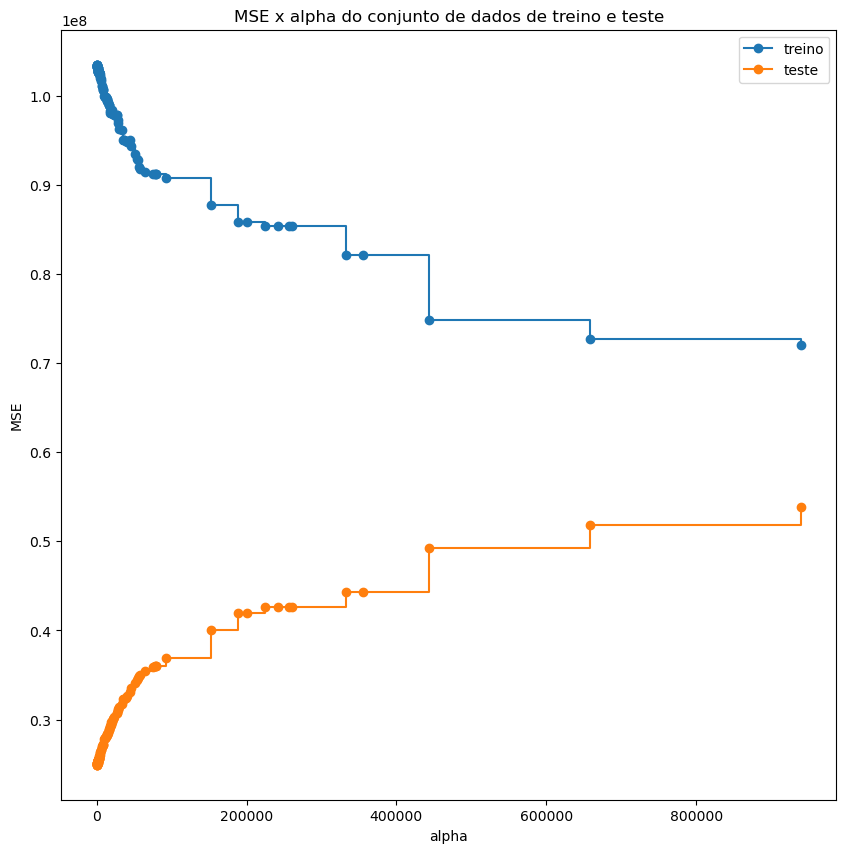

In [57]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [58]:
print(f"R² de treino é: {reg2.score(X_train, y_train)*100:.2f}%")
print(f"R² de teste é: {reg2.score(X_test, y_test)*100:.2f}%")

R² de treino é: 22.52%
R² de teste é: 12.29%


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.